In [295]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
import seaborn as sns

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

import warnings
warnings.filterwarnings(action="ignore")

In [ ]:
heart_attack_df = pd.read_csv('heart_attack.csv')

In [ ]:
heart_attack_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.000,1.000,1.000,145.000,233.000,1.000,2.000,150.000,0.000,2.300,3.000,0.0,6.0,negative
1,37.000,1.000,3.000,130.000,250.000,0.000,0.000,187.000,0.000,3.500,3.000,0.0,3.0,negative
2,41.000,0.000,2.000,130.000,204.000,0.000,2.000,172.000,0.000,1.400,1.000,0.0,3.0,negative
3,56.000,1.000,2.000,120.000,236.000,0.000,0.000,178.000,0.000,0.800,1.000,0.0,3.0,negative
4,57.000,0.000,4.000,120.000,354.000,0.000,0.000,163.000,1.000,0.600,1.000,0.0,3.0,negative


In [ ]:
heart_attack_df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
172,64.000,1.000,4.000,145.000,212.000,0.000,2.000,132.000,0.000,2.000,2.000,2.0,6.0,positive
173,38.000,1.000,1.000,120.000,231.000,0.000,0.000,182.000,1.000,3.800,2.000,0.0,7.0,positive
174,61.000,1.000,4.000,138.000,166.000,0.000,2.000,125.000,1.000,3.600,2.000,1.0,3.0,positive
175,58.000,1.000,4.000,114.000,318.000,0.000,1.000,140.000,0.000,4.400,3.000,3.0,6.0,positive
176,70.000,1.000,4.000,145.000,174.000,0.000,0.000,125.000,1.000,2.600,3.000,0.0,7.0,positive


In [ ]:
heart_attack_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       177 non-null    float64
 1   sex       177 non-null    float64
 2   cp        177 non-null    float64
 3   trestbps  177 non-null    float64
 4   chol      177 non-null    float64
 5   fbs       177 non-null    float64
 6   restecg   177 non-null    float64
 7   thalach   177 non-null    float64
 8   exang     177 non-null    float64
 9   oldpeak   177 non-null    float64
 10  slope     177 non-null    float64
 11  ca        177 non-null    object 
 12  thal      177 non-null    object 
 13  num       177 non-null    object 
dtypes: float64(11), object(3)
memory usage: 19.5+ KB


In [ ]:
"""for x in heart_attack_df['ca']:
  if heart_attack_df['ca'] == '<null>':
    print(x)
    """

heart_attack_df['ca'] = heart_attack_df['ca'].str.replace('<null>','0')
heart_attack_df['thal'] = heart_attack_df['thal'].str.replace('<null>','0')
heart_attack_df['num'] = heart_attack_df['num'].str.replace('<null>','')

In [ ]:
heart_attack_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       177 non-null    float64
 1   sex       177 non-null    float64
 2   cp        177 non-null    float64
 3   trestbps  177 non-null    float64
 4   chol      177 non-null    float64
 5   fbs       177 non-null    float64
 6   restecg   177 non-null    float64
 7   thalach   177 non-null    float64
 8   exang     177 non-null    float64
 9   oldpeak   177 non-null    float64
 10  slope     177 non-null    float64
 11  ca        177 non-null    object 
 12  thal      177 non-null    object 
 13  num       177 non-null    object 
dtypes: float64(11), object(3)
memory usage: 19.5+ KB


In [ ]:
heart_attack_df['ca'] = pd.to_numeric(heart_attack_df['ca'])

In [ ]:
heart_attack_df['thal'] = pd.to_numeric(heart_attack_df['thal'])

In [ ]:
for x in heart_attack_df.columns:
    #printing unique values
    print(x ,':', len(heart_attack_df[x].unique()))

age : 41
sex : 2
cp : 4
trestbps : 41
chol : 111
fbs : 2
restecg : 3
thalach : 69
exang : 2
oldpeak : 31
slope : 3
ca : 4
thal : 4
num : 2


In [ ]:
heart_attack_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       177 non-null    float64
 1   sex       177 non-null    float64
 2   cp        177 non-null    float64
 3   trestbps  177 non-null    float64
 4   chol      177 non-null    float64
 5   fbs       177 non-null    float64
 6   restecg   177 non-null    float64
 7   thalach   177 non-null    float64
 8   exang     177 non-null    float64
 9   oldpeak   177 non-null    float64
 10  slope     177 non-null    float64
 11  ca        177 non-null    float64
 12  thal      177 non-null    float64
 13  num       177 non-null    object 
dtypes: float64(13), object(1)
memory usage: 19.5+ KB


In [ ]:
# applying one-hot encoding to the result of the test
heart_attack_df['num'] = pd.get_dummies(heart_attack_df.num, drop_first=True)
heart_attack_df['num']

0      0
1      0
2      0
3      0
4      0
      ..
172    1
173    1
174    1
175    1
176    1
Name: num, Length: 177, dtype: uint8

In [ ]:
heart_attack_df['thal'].replace(0.0, heart_attack_df['thal'].max())

0     6.000
1     3.000
2     3.000
3     3.000
4     3.000
       ... 
172   6.000
173   7.000
174   3.000
175   6.000
176   7.000
Name: thal, Length: 177, dtype: float64

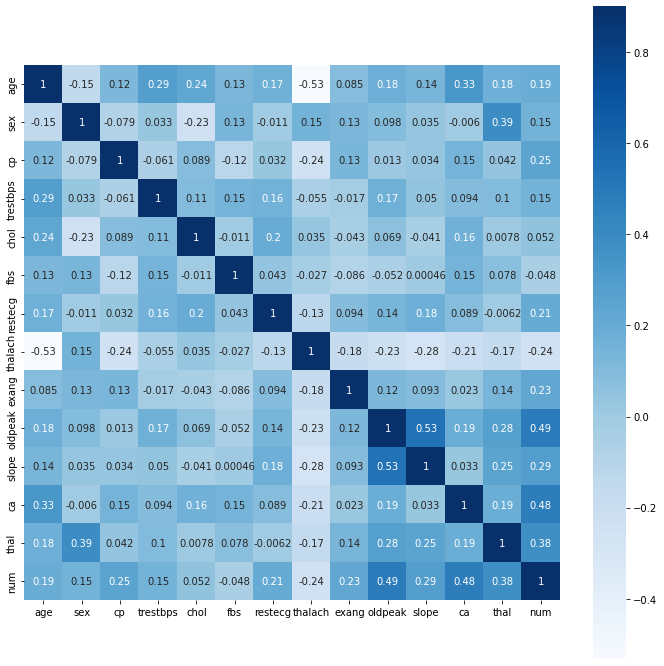

In [ ]:
corr = heart_attack_df.corr()
plt.subplots(figsize=(12,12))
sns.heatmap(corr, vmax=0.9, cmap="Blues", square=True, annot=True)

# Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
Y = heart_attack_df['num']

X = heart_attack_df[['chol', 'thalach', 'fbs']]

lrm = linear_model.LinearRegression()

lrm.fit(X, Y)

print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [ 0.00028586 -0.00316396 -0.04110863]

Intercept: 
 0.5064088944553358


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))

The number of observations in training set is 141
The number of observations in test set is 36


In [ ]:
# We add constant to the model as it's a best practice
# to do so everytime!
X_train = sm.add_constant(X_train)

# We fit an OLS model using statsmodels
results = sm.OLS(y_train, X_train).fit()

# We print the summary results
display(results.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    num   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     4.219
Date:                Sat, 11 Dec 2021   Prob (F-statistic):            0.00688
Time:                        14:31:53   Log-Likelihood:                -8.2777
No. Observations:                 141   AIC:                             24.56
Df Residuals:                     137   BIC:                             36.35
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5532      0.194      2.847      0.005       0.169       0.938
chol           0.0004      0.000      1.127      0.262      -0.000       0.001
thalach       -0.0037      0.001     -3.395      0.001      -0.006      -0.002
fbs           -0.0335      0.066     -0.507      0.613      -0.164       0.097
==============================================================================
Omnibus:                       95.743   Durbin-Watson:                   2.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              412.031
Skew:                           2.707   Prob(JB):                     3.38e-90
Kurtosis:                       9.390   Cond. No.                     2.60e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# New Section

In [ ]:
def create_model(X, y):
    X_train, X_test, y_train, y_test =  train_test_split(X, Y, test_size=0.20, random_state=111, stratify = y)
    
    logreg_model = LogisticRegression()
    logreg_model.fit(X_train, y_train)

    pred_train = logreg_model.predict(X_train)
    pred_test = logreg_model.predict(X_test)
    
    conf_mtx_train = confusion_matrix(y_train, pred_train)
    conf_mtx_test = confusion_matrix(y_test, pred_test)
    
    print("Accuracy : {}\n".format(logreg_model.score(X_test, y_test)))
    
    print("Train Dataset")
    print(classification_report(y_train, pred_train))
    
    print("Test Dataset")
    print(classification_report(y_test, pred_test))
    
    return  None

In [ ]:
X = heart_attack_df.drop('num', axis=1)
Y = heart_attack_df['num']

create_model(X,Y)

Accuracy : 0.9166666666666666

Train Dataset
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       131
           1       0.89      0.80      0.84        10

    accuracy                           0.98       141
   macro avg       0.94      0.90      0.92       141
weighted avg       0.98      0.98      0.98       141

Test Dataset
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        33
           1       0.50      0.33      0.40         3

    accuracy                           0.92        36
   macro avg       0.72      0.65      0.68        36
weighted avg       0.90      0.92      0.91        36



# Up-Sampling
Since we have a few amounts of data.

In [ ]:
from sklearn.utils import resample

In [ ]:
heart_attack_df['num'].value_counts()

0    164
1     13
Name: num, dtype: int64

In [ ]:
negatives = heart_attack_df[heart_attack_df.num == 0]
positives = heart_attack_df[heart_attack_df.num == 1]

positives_upsampled = resample(positives,
                                         replace = True,
                                         n_samples = len(negatives),
                                         random_state = 111)

upsampled_df = pd.concat([negatives, positives_upsampled])
upsampled_df.num.value_counts()

1    164
0    164
Name: num, dtype: int64

In [ ]:
X = upsampled_df.drop('num', axis=1)
Y = upsampled_df['num']

create_model(X,Y)

Accuracy : 0.9696969696969697

Train Dataset
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       131
           1       0.95      1.00      0.97       131

    accuracy                           0.97       262
   macro avg       0.97      0.97      0.97       262
weighted avg       0.97      0.97      0.97       262

Test Dataset
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.94      1.00      0.97        33

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



#Up-Sampling improved and made my model amazing.

# SMOTE Analysis

In [297]:
pip install -U imbalanced-learn

In [299]:
from imblearn.over_sampling import SMOTE

y = heart_attack_df.num
X = heart_attack_df.drop('num', axis=1)

sm = SMOTE(random_state=27, sampling_strategy=1.0)
X_smote, y_smote = sm.fit_resample(X, y)

In [300]:
create_model(X_smote, y_smote)


Accuracy : 0.9696969696969697

Train Dataset
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       131
           1       0.95      1.00      0.97       131

    accuracy                           0.97       262
   macro avg       0.97      0.97      0.97       262
weighted avg       0.97      0.97      0.97       262

Test Dataset
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        33
           1       0.94      1.00      0.97        33

    accuracy                           0.97        66
   macro avg       0.97      0.97      0.97        66
weighted avg       0.97      0.97      0.97        66



#the same result with up-sampling. I guess it can not go any further.

# ADASYN

In [302]:
from imblearn.over_sampling import ADASYN

In [304]:
y = heart_attack_df.num
X = heart_attack_df.drop('num', axis=1)

ad = ADASYN()
X_adasyn, y_adasyn = ad.fit_resample(X, y)

In [305]:
create_model(X_adasyn, y_adasyn)

ValueError: ignored

# could not find why I got this inconsistent numbers at the ADASYN algorithm. ([329,328])